In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject

Bad key "text.kerning_factor" on line 4 in
D:\Anaconda\programa\envs\kaggle_challenge\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

def describe_num(num_attributes):
    a = num_attributes.describe().T.reset_index()
    
    d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew())).T      
    d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis())).T
    d7 = pd.DataFrame(num_attributes.apply( lambda x: x.unique().shape[0])).T
    
    n = pd.concat([d4, d5, d6, d7], axis=0).T.reset_index()
    n.columns = ['attibutes', 'range', 'skew', 'kurtosis', 'unique']
    b = a.merge(n, right_on='attibutes', left_on='index')
    b.drop('index', axis=1, inplace=True)
    columns = ['attibutes', 'count', 'mean', 'std', '25%', '50%', '75%', 'min', 'max', 'range',
           'skew', 'kurtosis', 'unique']
    return b[columns]

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

def cramer_v(x,y):
    cm = pd.crosstab(x, y).values #no curso ele usa a função .as_matrix() que foi descontinuada.
    chi2 = ss.chi2_contingency(cm)[0]
    n = cm.sum()
    r, k = cm.shape
    chi2corr =  max(0, chi2 - (k-1)*(r-1)/(n-1))
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (k-1)**2/(n-1)
    return np.sqrt((chi2corr/n)/(min(kcorr-1,rcorr-1)))
        
pd.options.display.float_format = '{:.2f}'.format

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
df_raw_cli = pd.read_csv('amostras_metadados/amostras/amostra_agroclimatology_budokai.csv')
df_raw_soja = pd.read_csv('amostras_metadados/amostras/amostra_produtividade_soja_modelagem.csv')

In [139]:
dict_municp = {4100103: 'Abatiá', 4100459: 'Altamira do Paraná', 4100608: 'Alto Paraná'}
df_raw_soja

,nivel,codigo_ibge,name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,MU,4100103,Abatiá,2600.00,1750.00,2100.00,2600.00,2600.00,2080.00,2590.00,3350.00,2320.00,3100.00,1460.00,2640.00,2760.00,3480.00
1,MU,4100459,Altamira do Paraná,3100.00,2460.00,2950.00,2950.00,2749.00,2749.00,3250.00,3200.00,2197.00,3223.00,3471.00,3099.00,2871.00,3818.00
2,MU,4100608,Alto Paraná,1487.00,1365.00,1734.00,2727.00,2400.00,1620.00,2899.00,2899.00,1737.00,2880.00,2000.00,1800.00,2221.00,2980.00
3,MU,4100707,Alto Piquiri,2300.00,2300.00,2700.00,3193.00,2701.00,2097.00,3130.00,3310.00,2000.00,3000.00,3192.00,3488.00,2589.00,3700.00
4,MU,4100509,Altônia,1050.00,1800.00,1255.00,2355.00,2600.00,1300.00,3000.00,2773.00,815.00,2137.00,1800.00,2455.00,2780.00,2900.00


In [10]:
df_raw_cli['codigo_ibge'].unique()

array([4100103, 4100459, 4100608], dtype=int64)

In [19]:
df_raw_cli['codigo_ibge'].value_counts()

4100103    365
4100459    365
4100608    269
Name: codigo_ibge, dtype: int64

In [16]:
df1 = df_raw_cli.copy()

In [140]:
df1['data'] = pd.to_datetime(df1['data'], format='%Y%m%d')
df1['dia'] = df1['data'].dt.day
df1['mes'] = df1['data'].dt.month
df1['ano'] = df1['data'].dt.year
df1['codigo_ibge'] = df1['codigo_ibge'].map(dict_municp)

In [141]:
df1.head()

,data,codigo_ibge,latitude,longitude,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,QV2M,RH2M,PRECTOTCORR,PS,WS2M,WS2M_MAX,WS2M_MIN,WS2M_RANGE,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,GWETTOP,GWETROOT,GWETPROF,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,dia,mes,ano
0,2003-01-01,Abatiá,-23.30,-50.31,12.71,26.83,21.08,23.77,33.15,20.43,26.46,16.72,75.50,1.87,94.14,0.79,1.24,0.45,0.80,1.87,2.48,0.75,1.73,3.47,5.07,0.97,4.09,0.65,0.64,0.68,23.50,30.53,42.75,129.63,165.10,17.95,0.57,2.99,1,1,2003
1,2003-01-02,Abatiá,-23.30,-50.31,8.32,25.83,22.34,24.15,29.98,21.65,25.98,18.13,81.75,11.24,94.03,0.79,1.54,0.27,1.27,1.71,2.91,0.39,2.52,3.05,5.14,0.62,4.53,0.72,0.65,0.68,18.79,29.75,42.74,104.59,160.21,14.59,0.47,2.46,2,1,2003
2,2003-01-03,Abatiá,-23.30,-50.31,6.22,23.68,21.30,22.49,27.04,20.82,23.69,16.91,87.00,16.15,94.03,1.14,1.98,0.42,1.56,2.29,3.73,0.87,2.86,3.66,5.35,1.31,4.04,0.75,0.66,0.68,15.68,29.39,42.72,88.91,157.65,12.41,0.41,2.11,3,1,2003
3,2003-01-04,Abatiá,-23.30,-50.31,5.24,23.37,21.51,22.42,25.91,20.67,23.33,17.15,89.88,11.81,93.90,0.91,2.07,0.35,1.72,1.93,3.97,0.98,2.99,3.34,5.45,1.98,3.46,0.77,0.69,0.70,13.71,28.99,42.69,78.73,155.84,11.04,0.34,1.79,4,1,2003
4,2003-01-05,Abatiá,-23.30,-50.31,8.83,24.48,21.58,22.94,29.21,20.38,24.29,17.27,86.12,4.30,93.80,1.06,1.77,0.44,1.33,2.22,3.42,1.30,2.12,3.76,4.65,2.98,1.67,0.73,0.70,0.70,15.15,29.28,42.66,85.01,155.69,11.80,0.37,1.91,5,1,2003


In [142]:
dados_temperatura = ['data', 'T2M_RANGE', 'TS', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M', 'QV2M', 'RH2M']
dados_precipitacao = ['data', 'PRECTOTCORR']
dados_pressao = ['data', 'PS']
dados_vento = ['data', 'WS2M', 'WS2M_MAX', 'WS2M_MIN', 'WS2M_RANGE', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE']
dados_umidade = ['data', 'PS', 'GWETTOP', 'GWETROOT', 'GWETPROF']
dados_radiacao_solar = ['data', 'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'TOA_SW_DWN']
dados_radiacao_especifica = ['data', 'ALLSKY_SFC_PAR_TOT', 'CLRSKY_SFC_PAR_TOT', 'ALLSKY_SFC_UVA', 'ALLSKY_SFC_UVB', 'ALLSKY_SFC_UV_INDEX']

# Separação por município

In [143]:
df_abatia = df1[df1['codigo_ibge'] == 4100103]
df_altamira_parana = df1[df1['codigo_ibge'] == 4100459]
df_alto_parana = df1[df1['codigo_ibge'] == 4100608]

## DADOS SOBRE TEMPERATURA
- Abatia - 2.600 - Fica no meio termo
- Altamira do Paraná - 3.100 - Geralmente é mais frio
- Alto do Paraná - 1.487 - É mais quente em relação aos outros municípios

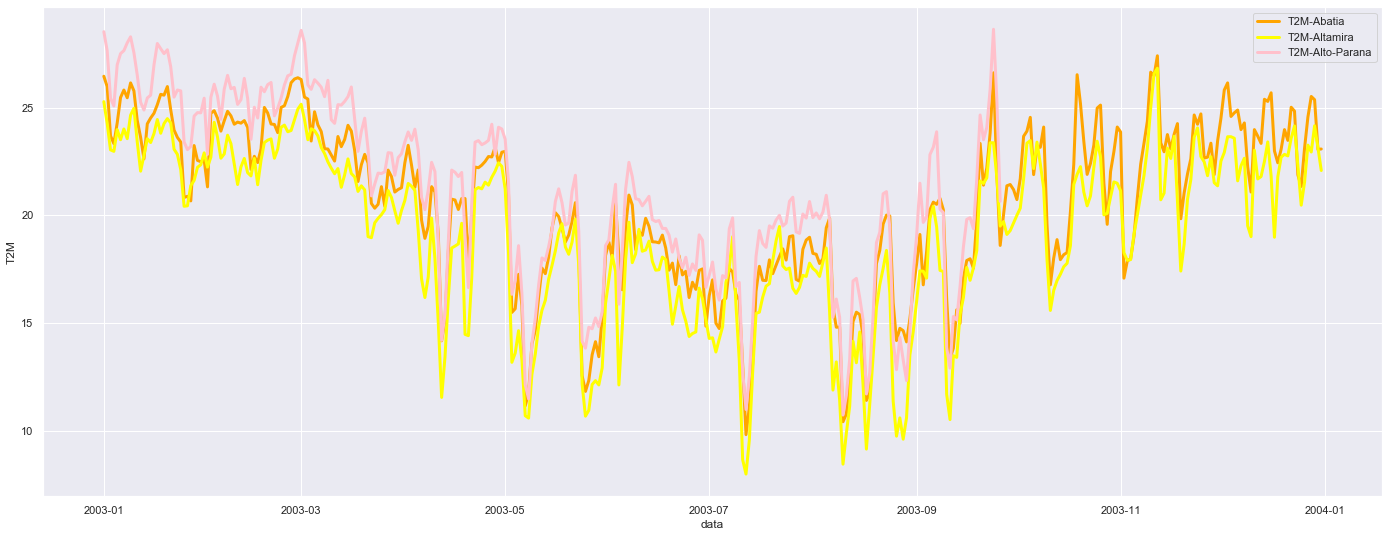

In [93]:
df_abatia_temperatura = df_abatia[dados_temperatura]
df_altamira_parana_temperatura = df_altamira_parana[dados_temperatura]
df_alto_parana_temperatura = df_alto_parana[dados_temperatura]

f, ax = plt.subplots(1, 1)
#sns.lineplot(data=df_abatia_temperatura, x='data', y='T2M_RANGE')
sns.lineplot(data=df_abatia_temperatura, x='data', y='T2M', linewidth=3, color='orange', label='T2M-Abatia').legend()
#sns.lineplot(data=df_abatia_temperatura, x='data', y='T2M_MAX', color='red', linestyle='--')
#sns.lineplot(data=df_abatia_temperatura, x='data', y='T2M_MIN', color='blue', linestyle='--')
sns.lineplot(data=df_altamira_parana_temperatura, x='data', y='T2M', linewidth=3, color='yellow', label='T2M-Altamira').legend()
sns.lineplot(data=df_alto_parana_temperatura, x='data', y='T2M', linewidth=3, color='pink', label='T2M-Alto-Parana').legend()

## DADOS SOBRE PRECIPITACAO
- Abatia - 2.600 - Chove menos que Altamira, porém é consistente
- Altamira do Paraná - 3.100 - Geralmente é mais chuvoso - Concentração de chuva ocorre mais para o final do ano
- Alto do Paraná - 1.487 - É menos consistente no regime de chuvas, periodo total está cortado

In [145]:
df1[['codigo_ibge', 'PRECTOTCORR']].groupby('codigo_ibge').sum().sort_values('PRECTOTCORR', ascending=False)

,PRECTOTCORR
codigo_ibge,
Altamira do Paraná,1807.02
Abatiá,1337.14
Alto Paraná,1032.61


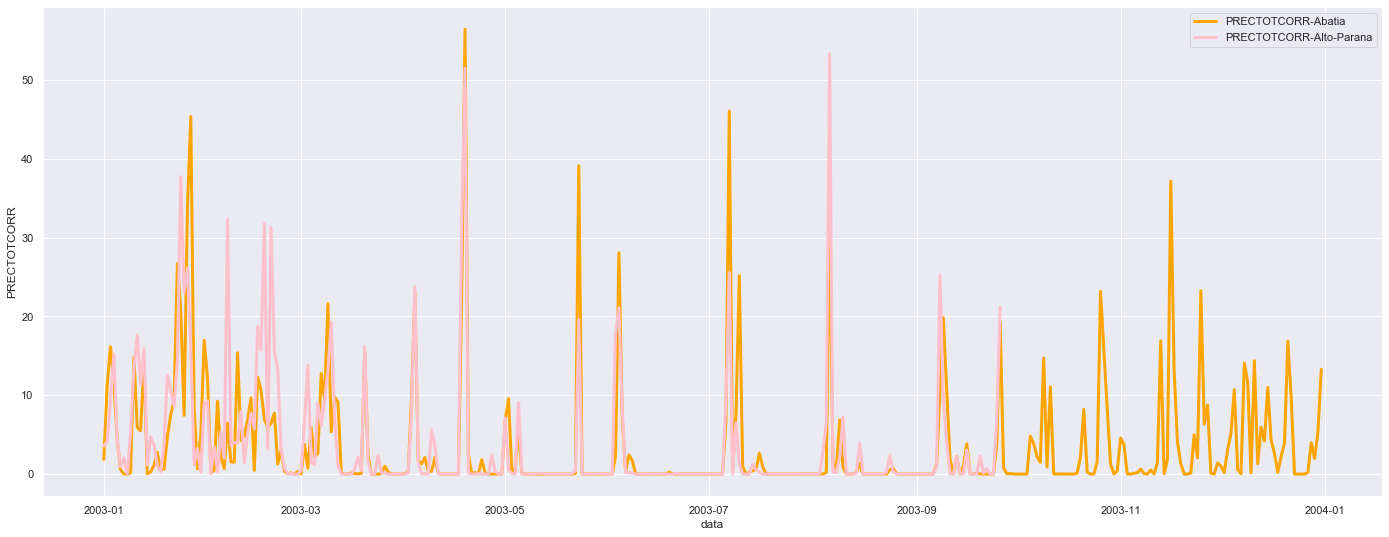

In [102]:
df_abatia_temperatura = df_abatia[dados_precipitacao]
df_altamira_parana_temperatura = df_altamira_parana[dados_precipitacao]
df_alto_parana_temperatura = df_alto_parana[dados_precipitacao]
sns.lineplot(data=df_abatia_temperatura, x='data', y='PRECTOTCORR', linewidth=3, color='orange', label='PRECTOTCORR-Abatia').legend()
#sns.lineplot(data=df_altamira_parana_temperatura, x='data', y='PRECTOTCORR', linewidth=3, color='yellow', label='PRECTOTCORR-Altamira').legend()
sns.lineplot(data=df_alto_parana_temperatura, x='data', y='PRECTOTCORR', linewidth=3, color='pink', label='PRECTOTCORR-Alto-Parana').legend()

## DADOS SOBRE PRESSÃO
- Abatia - 2.600 - É mais alto que Alto do Paraná
- Altamira do Paraná - 3.100 - É mais alto que Alto do Paraná
- Alto do Paraná - 1.487 - É uma região mais baixa.

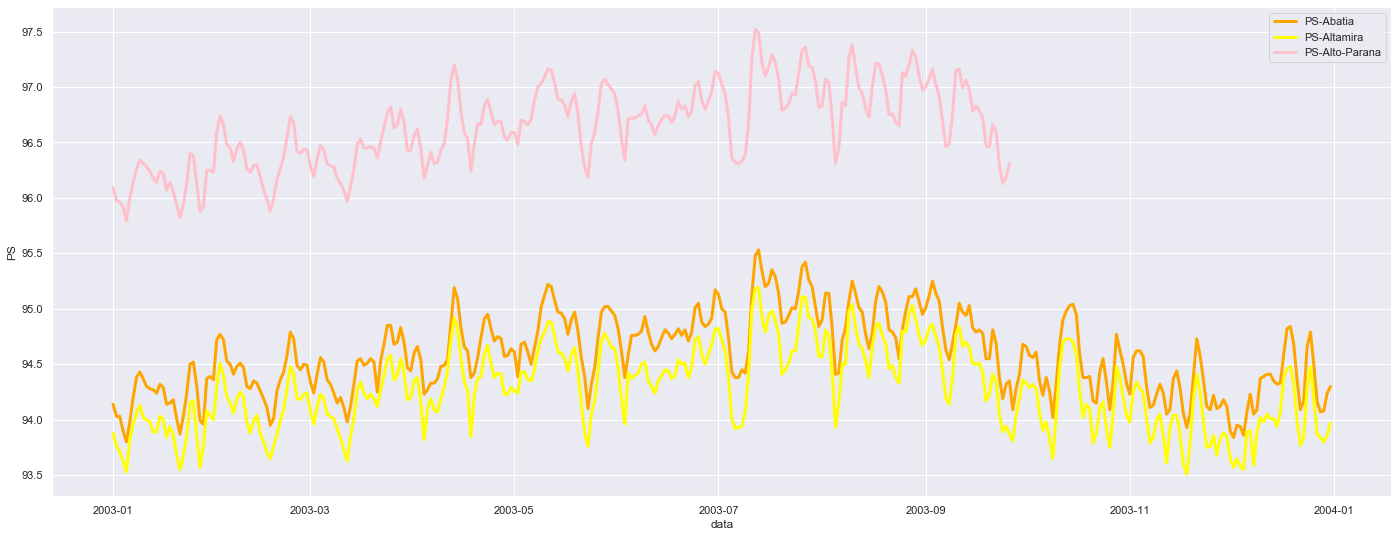

In [96]:
df_abatia_temperatura = df_abatia[dados_pressao]
df_altamira_parana_temperatura = df_altamira_parana[dados_pressao]
df_alto_parana_temperatura = df_alto_parana[dados_pressao]
sns.lineplot(data=df_abatia_temperatura, x='data', y='PS', linewidth=3, color='orange', label='PS-Abatia').legend()
sns.lineplot(data=df_altamira_parana_temperatura, x='data', y='PS', linewidth=3, color='yellow', label='PS-Altamira').legend()
sns.lineplot(data=df_alto_parana_temperatura, x='data', y='PS', linewidth=3, color='pink', label='PS-Alto-Parana').legend()

## DADOS SOBRE VENTO
- Abatia - 2.600 - Está na mesma altitude (alto) que Altamira, porém a exposição ao vento é maior
- Altamira do Paraná - 3.100 - Apesar de estar em altitude parecida com Abatia, a região é possui menos vento apesar de estar numa região alta
- Alto do Paraná - 1.487 - Está numa região mais baixa com concentração maior de ventos.

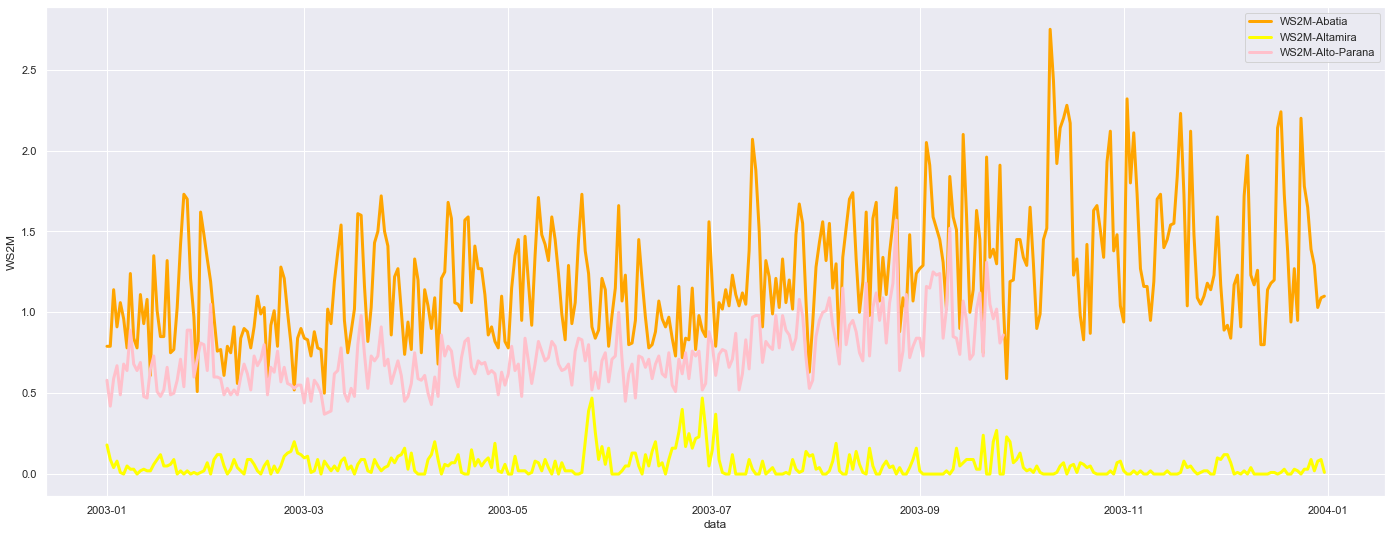

In [105]:
df_abatia_temperatura = df_abatia[dados_vento]
df_altamira_parana_temperatura = df_altamira_parana[dados_vento]
df_alto_parana_temperatura = df_alto_parana[dados_vento]
sns.lineplot(data=df_abatia_temperatura, x='data', y='WS2M', linewidth=3, color='orange', label='WS2M-Abatia').legend()
sns.lineplot(data=df_altamira_parana_temperatura, x='data', y='WS2M', linewidth=3, color='yellow', label='WS2M-Altamira').legend()
sns.lineplot(data=df_alto_parana_temperatura, x='data', y='WS2M', linewidth=3, color='pink', label='WS2M-Alto-Parana').legend()

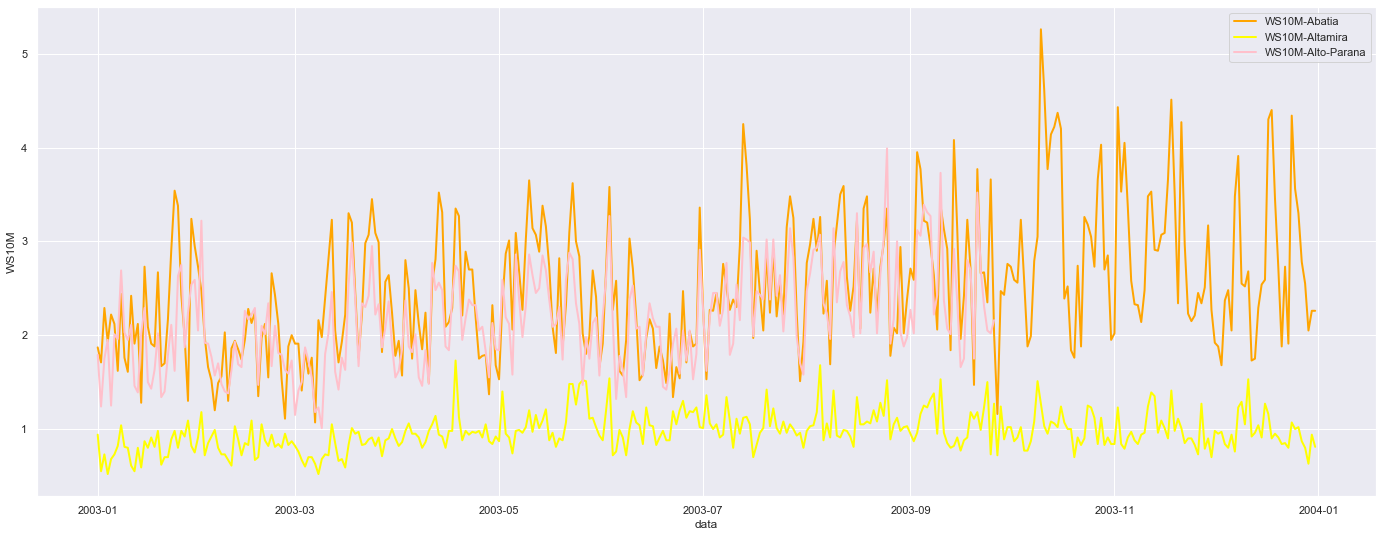

In [106]:
sns.lineplot(data=df_abatia_temperatura, x='data', y='WS10M', linewidth=2, color='orange', label='WS10M-Abatia').legend()
sns.lineplot(data=df_altamira_parana_temperatura, x='data', y='WS10M', linewidth=2, color='yellow', label='WS10M-Altamira').legend()
sns.lineplot(data=df_alto_parana_temperatura, x='data', y='WS10M', linewidth=2, color='pink', label='WS10M-Alto-Parana').legend()

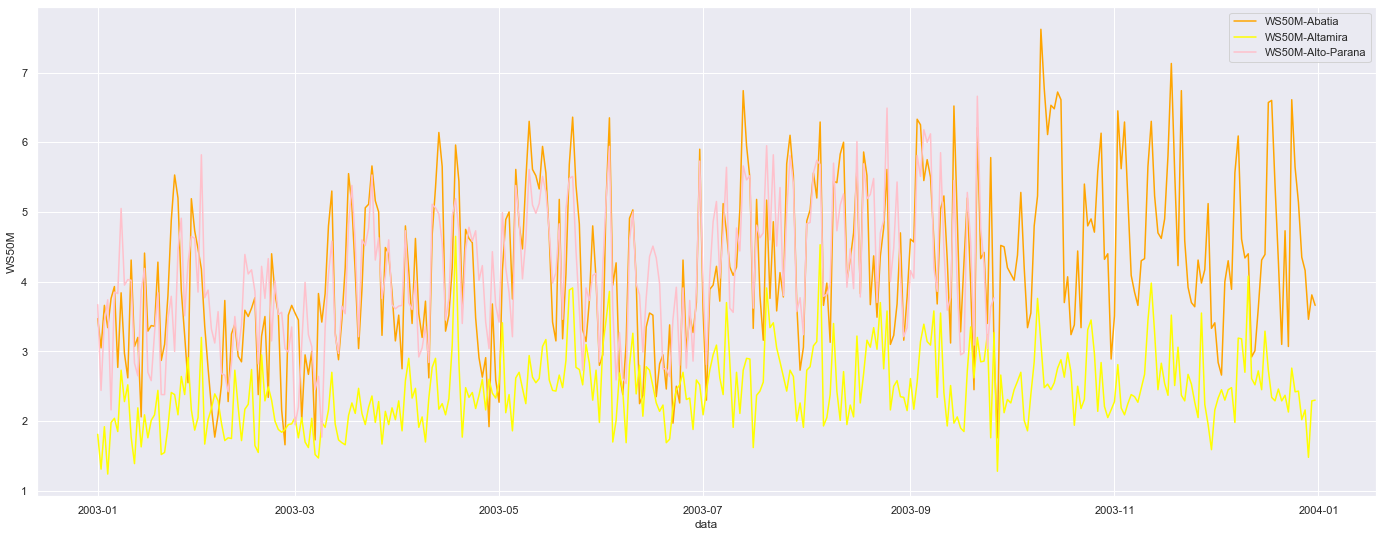

In [108]:
sns.lineplot(data=df_abatia_temperatura, x='data', y='WS50M', linewidth=1.5, color='orange', label='WS50M-Abatia').legend()
sns.lineplot(data=df_altamira_parana_temperatura, x='data', y='WS50M', linewidth=1.5, color='yellow', label='WS50M-Altamira').legend()
sns.lineplot(data=df_alto_parana_temperatura, x='data', y='WS50M', linewidth=1.5, color='pink', label='WS50M-Alto-Parana').legend()

## DADOS SOBRE UMIDADE DO SOLO
- Abatia - 2.600 - Não perde tanta água quanto Alto do Paraná, porém não fica saturado por maior tempo quanto Altamira.
- Altamira do Paraná - 3.100 - Solo retém mais umidade, pode indicar o motivo de boas colheitas.
- Alto do Paraná - 1.487 - Apartentemente é um solo que rapidamente se satura, porém rapidamente perde a retenção da água. Talvez tenha uma característica mais arenosa.

In [79]:
df_raw_soja

,nivel,codigo_ibge,name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,MU,4100103,Abatiá,2600.00,1750.00,2100.00,2600.00,2600.00,2080.00,2590.00,3350.00,2320.00,3100.00,1460.00,2640.00,2760.00,3480.00
1,MU,4100459,Altamira do Paraná,3100.00,2460.00,2950.00,2950.00,2749.00,2749.00,3250.00,3200.00,2197.00,3223.00,3471.00,3099.00,2871.00,3818.00
2,MU,4100608,Alto Paraná,1487.00,1365.00,1734.00,2727.00,2400.00,1620.00,2899.00,2899.00,1737.00,2880.00,2000.00,1800.00,2221.00,2980.00
3,MU,4100707,Alto Piquiri,2300.00,2300.00,2700.00,3193.00,2701.00,2097.00,3130.00,3310.00,2000.00,3000.00,3192.00,3488.00,2589.00,3700.00
4,MU,4100509,Altônia,1050.00,1800.00,1255.00,2355.00,2600.00,1300.00,3000.00,2773.00,815.00,2137.00,1800.00,2455.00,2780.00,2900.00


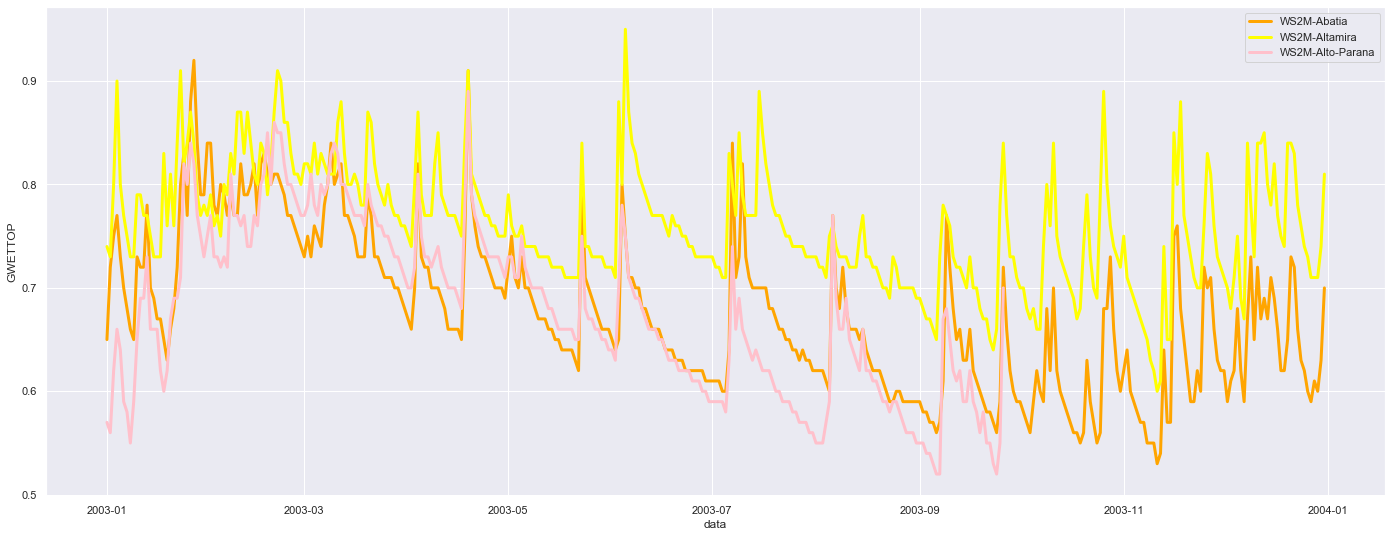

In [111]:
df_abatia_temperatura = df_abatia[dados_umidade]
df_altamira_parana_temperatura = df_altamira_parana[dados_umidade]
df_alto_parana_temperatura = df_alto_parana[dados_umidade]
sns.lineplot(data=df_abatia_temperatura, x='data', y='GWETTOP', linewidth=3, color='orange', label='WS2M-Abatia').legend()
sns.lineplot(data=df_altamira_parana_temperatura, x='data', y='GWETTOP', linewidth=3, color='yellow', label='WS2M-Altamira').legend()
sns.lineplot(data=df_alto_parana_temperatura, x='data', y='GWETTOP', linewidth=3, color='pink', label='WS2M-Alto-Parana').legend()

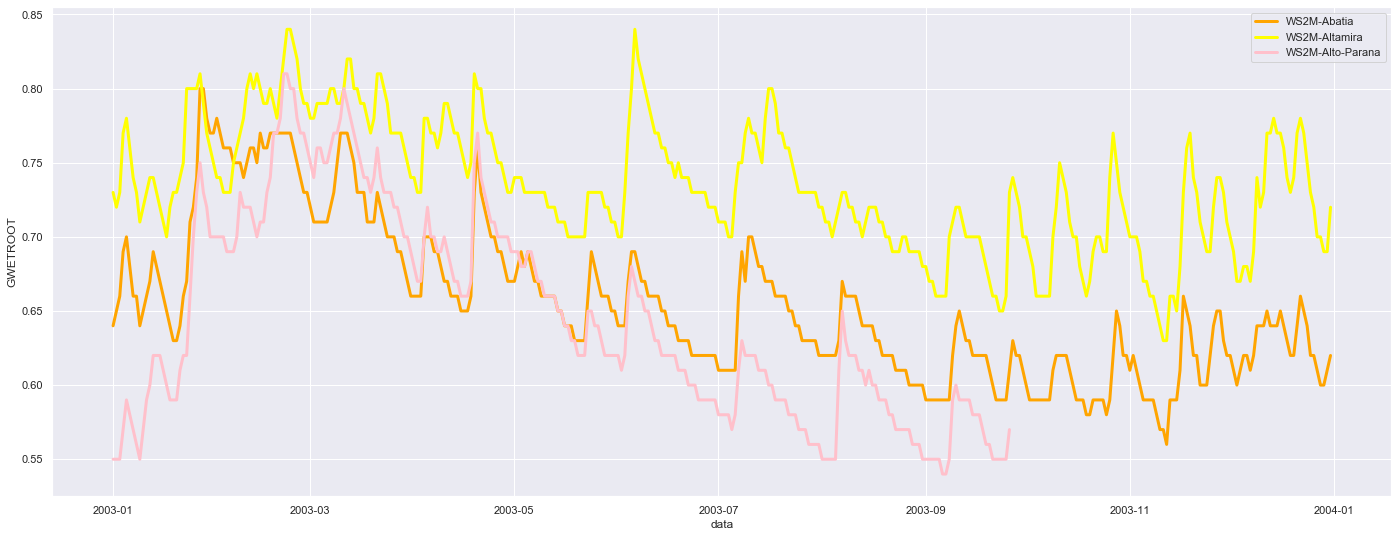

In [112]:
df_abatia_temperatura = df_abatia[dados_umidade]
df_altamira_parana_temperatura = df_altamira_parana[dados_umidade]
df_alto_parana_temperatura = df_alto_parana[dados_umidade]
sns.lineplot(data=df_abatia_temperatura, x='data', y='GWETROOT', linewidth=3, color='orange', label='WS2M-Abatia').legend()
sns.lineplot(data=df_altamira_parana_temperatura, x='data', y='GWETROOT', linewidth=3, color='yellow', label='WS2M-Altamira').legend()
sns.lineplot(data=df_alto_parana_temperatura, x='data', y='GWETROOT', linewidth=3, color='pink', label='WS2M-Alto-Parana').legend()

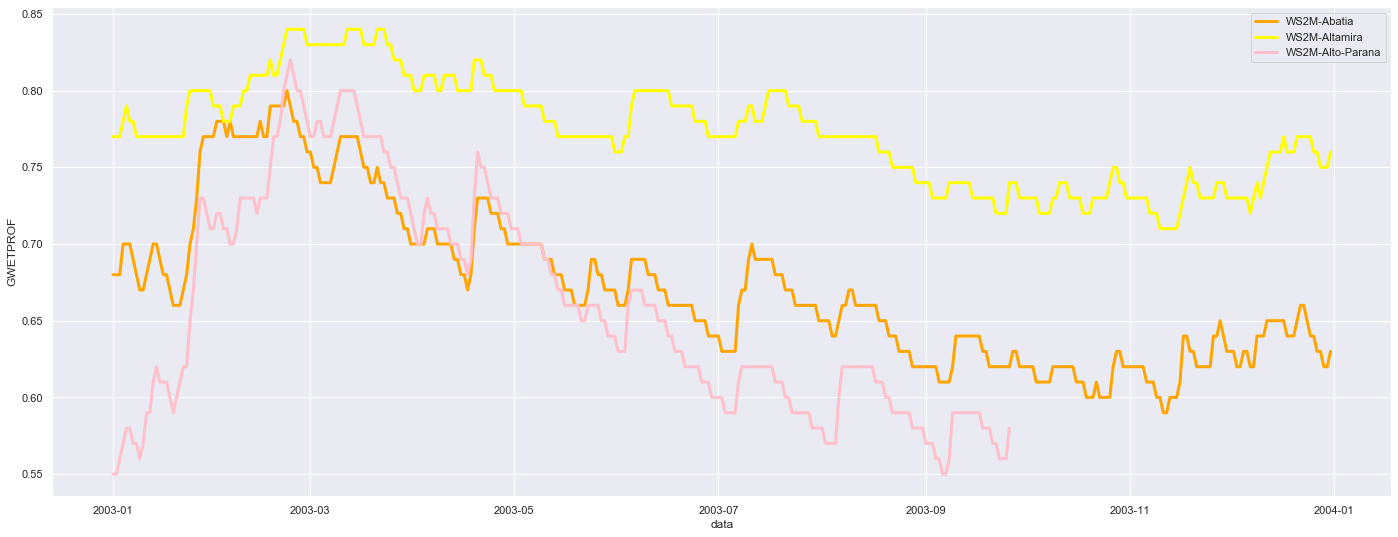

In [113]:
df_abatia_temperatura = df_abatia[dados_umidade]
df_altamira_parana_temperatura = df_altamira_parana[dados_umidade]
df_alto_parana_temperatura = df_alto_parana[dados_umidade]
sns.lineplot(data=df_abatia_temperatura, x='data', y='GWETPROF', linewidth=3, color='orange', label='WS2M-Abatia').legend()
sns.lineplot(data=df_altamira_parana_temperatura, x='data', y='GWETPROF', linewidth=3, color='yellow', label='WS2M-Altamira').legend()
sns.lineplot(data=df_alto_parana_temperatura, x='data', y='GWETPROF', linewidth=3, color='pink', label='WS2M-Alto-Parana').legend()

## DADOS SOBRE RADIAÇÃO - MEDIÇÕES DIÁRIAS
- Abatia - 2.600 - As curvas aparentemente seguem o mesmo padrão, analisar outros anos para verificar relevância.
- Altamira do Paraná - 3.100 - As curvas aparentemente seguem o mesmo padrão, analisar outros anos para verificar relevância.
- Alto do Paraná - 1.487 - As curvas aparentemente seguem o mesmo padrão, analisar outros anos para verificar relevância.

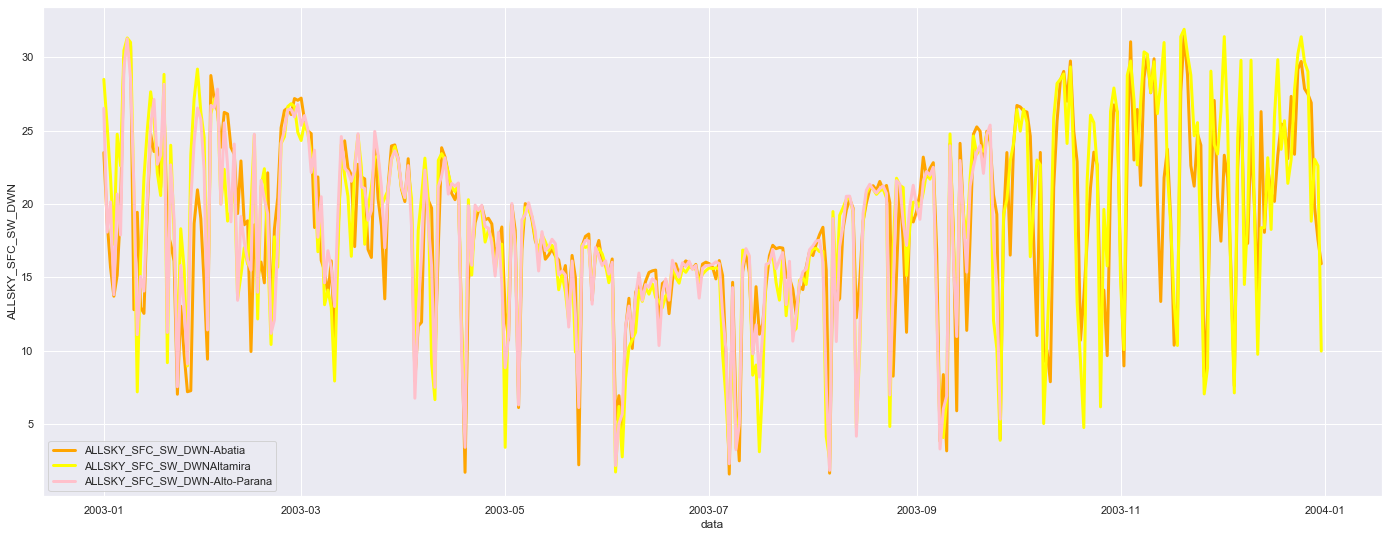

In [117]:
df_abatia_temperatura = df_abatia[dados_radiacao_solar]
df_altamira_parana_temperatura = df_altamira_parana[dados_radiacao_solar]
df_alto_parana_temperatura = df_alto_parana[dados_radiacao_solar]
sns.lineplot(data=df_abatia_temperatura, x='data', y='ALLSKY_SFC_SW_DWN', linewidth=3, color='orange', label='ALLSKY_SFC_SW_DWN-Abatia').legend()
sns.lineplot(data=df_altamira_parana_temperatura, x='data', y='ALLSKY_SFC_SW_DWN', linewidth=3, color='yellow', label='ALLSKY_SFC_SW_DWNAltamira').legend()
sns.lineplot(data=df_alto_parana_temperatura, x='data', y='ALLSKY_SFC_SW_DWN', linewidth=3, color='pink', label='ALLSKY_SFC_SW_DWN-Alto-Parana').legend()

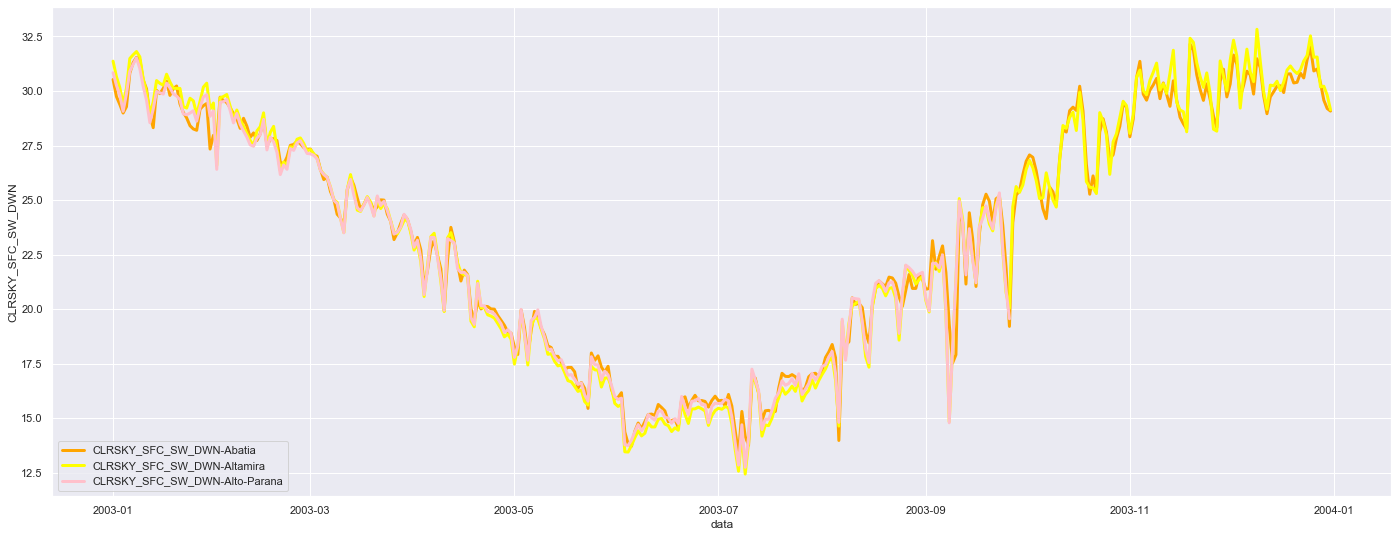

In [118]:
sns.lineplot(data=df_abatia_temperatura, x='data', y='CLRSKY_SFC_SW_DWN', linewidth=3, color='orange', label='CLRSKY_SFC_SW_DWN-Abatia').legend()
sns.lineplot(data=df_altamira_parana_temperatura, x='data', y='CLRSKY_SFC_SW_DWN', linewidth=3, color='yellow', label='CLRSKY_SFC_SW_DWN-Altamira').legend()
sns.lineplot(data=df_alto_parana_temperatura, x='data', y='CLRSKY_SFC_SW_DWN', linewidth=3, color='pink', label='CLRSKY_SFC_SW_DWN-Alto-Parana').legend()

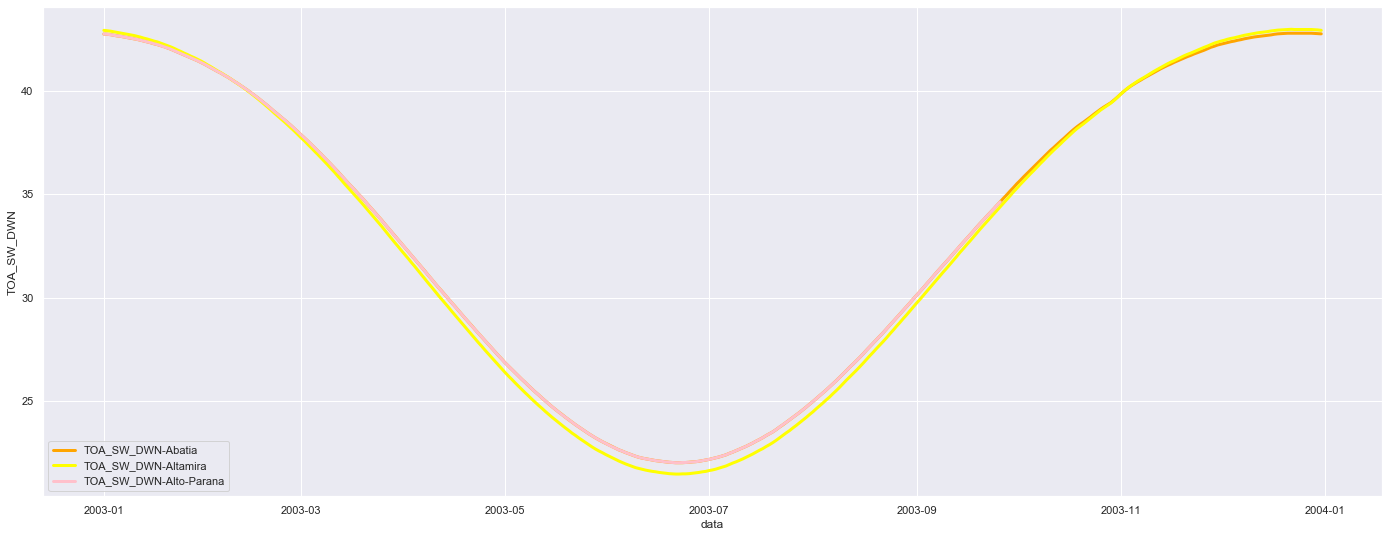

In [119]:
sns.lineplot(data=df_abatia_temperatura, x='data', y='TOA_SW_DWN', linewidth=3, color='orange', label='TOA_SW_DWN-Abatia').legend()
sns.lineplot(data=df_altamira_parana_temperatura, x='data', y='TOA_SW_DWN', linewidth=3, color='yellow', label='TOA_SW_DWN-Altamira').legend()
sns.lineplot(data=df_alto_parana_temperatura, x='data', y='TOA_SW_DWN', linewidth=3, color='pink', label='TOA_SW_DWN-Alto-Parana').legend()

## DADOS SOBRE RADIAÇÃO ESPECÍFICAS
- Abatia - 2.600 - As curvas aparentemente seguem o mesmo padrão, analisar outros anos para verificar relevância. Única variação ocorre na variável ALLSKY_SFC_UV_INDEX que para cada região tem um registro diferente.
- Altamira do Paraná - 3.100 - As curvas aparentemente seguem o mesmo padrão, analisar outros anos para verificar relevância. Única variação ocorre na variável ALLSKY_SFC_UV_INDEX que para cada região tem um registro diferente.
- Alto do Paraná - 1.487 - As curvas aparentemente seguem o mesmo padrão, analisar outros anos para verificar relevância. Única variação ocorre na variável ALLSKY_SFC_UV_INDEX que para cada região tem um registro diferente.

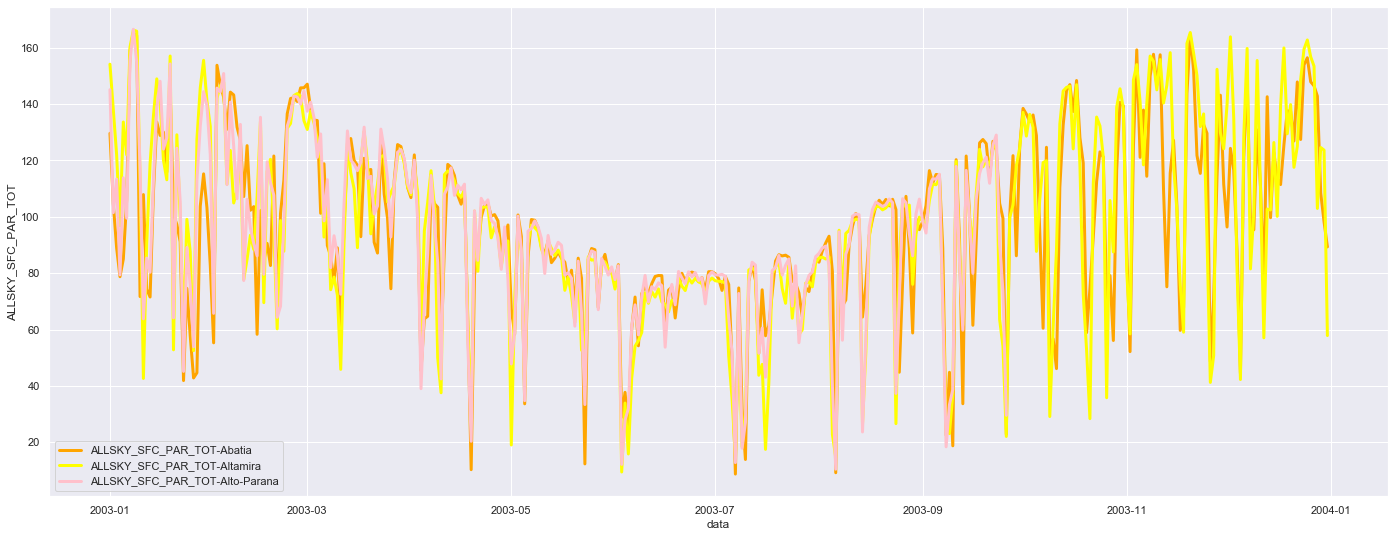

In [130]:
df_abatia_temperatura = df_abatia[dados_radiacao_especifica]
df_altamira_parana_temperatura = df_altamira_parana[dados_radiacao_especifica]
df_alto_parana_temperatura = df_alto_parana[dados_radiacao_especifica]
sns.lineplot(data=df_abatia_temperatura, x='data', y='ALLSKY_SFC_PAR_TOT', linewidth=3, color='orange', label='ALLSKY_SFC_PAR_TOT-Abatia').legend()
sns.lineplot(data=df_altamira_parana_temperatura, x='data', y='ALLSKY_SFC_PAR_TOT', linewidth=3, color='yellow', label='ALLSKY_SFC_PAR_TOT-Altamira').legend()
sns.lineplot(data=df_alto_parana_temperatura, x='data', y='ALLSKY_SFC_PAR_TOT', linewidth=3, color='pink', label='ALLSKY_SFC_PAR_TOT-Alto-Parana').legend()

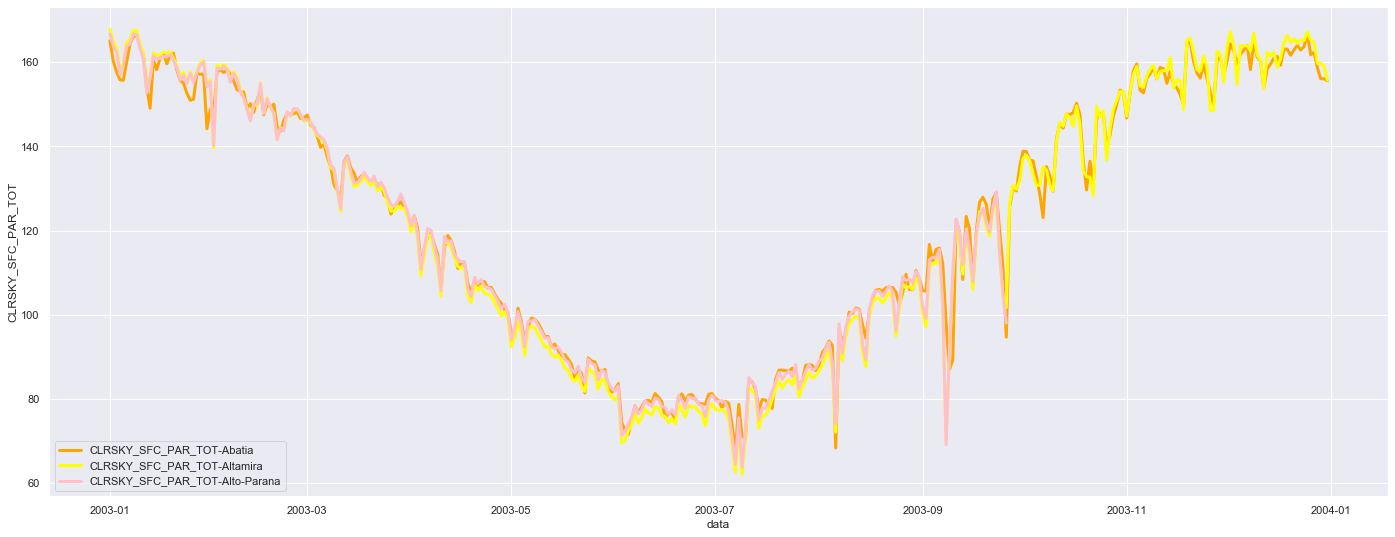

In [123]:
sns.lineplot(data=df_abatia_temperatura, x='data', y='CLRSKY_SFC_PAR_TOT', linewidth=3, color='orange', label='CLRSKY_SFC_PAR_TOT-Abatia').legend()
sns.lineplot(data=df_altamira_parana_temperatura, x='data', y='CLRSKY_SFC_PAR_TOT', linewidth=3, color='yellow', label='CLRSKY_SFC_PAR_TOT-Altamira').legend()
sns.lineplot(data=df_alto_parana_temperatura, x='data', y='CLRSKY_SFC_PAR_TOT', linewidth=3, color='pink', label='CLRSKY_SFC_PAR_TOT-Alto-Parana').legend()

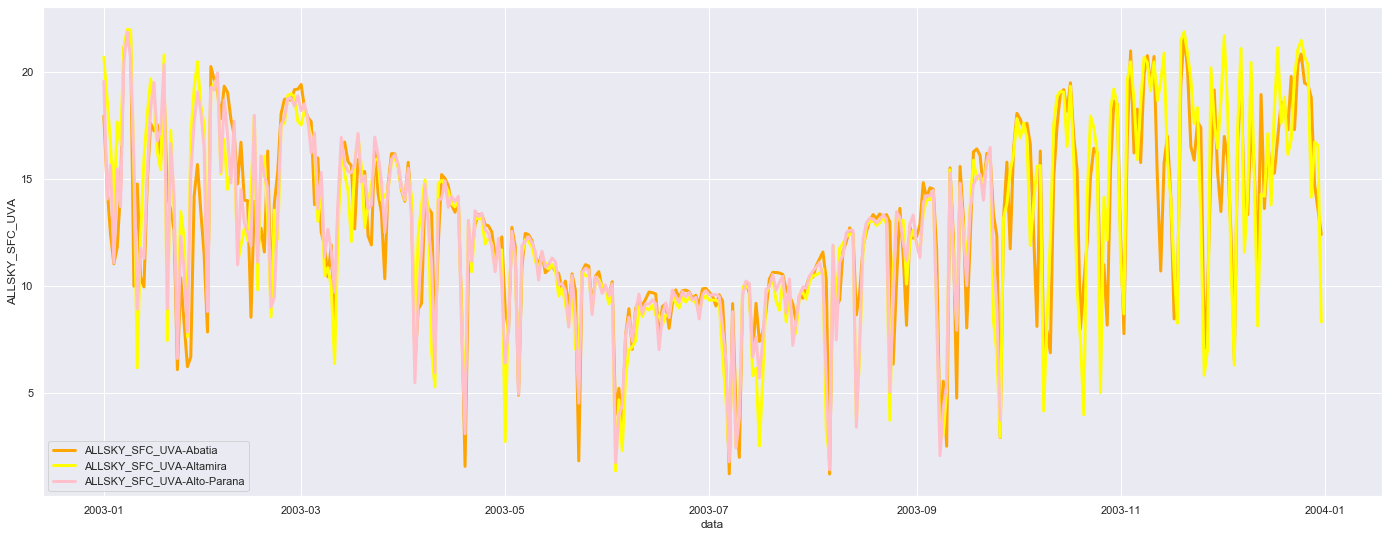

In [124]:
sns.lineplot(data=df_abatia_temperatura, x='data', y='ALLSKY_SFC_UVA', linewidth=3, color='orange', label='ALLSKY_SFC_UVA-Abatia').legend()
sns.lineplot(data=df_altamira_parana_temperatura, x='data', y='ALLSKY_SFC_UVA', linewidth=3, color='yellow', label='ALLSKY_SFC_UVA-Altamira').legend()
sns.lineplot(data=df_alto_parana_temperatura, x='data', y='ALLSKY_SFC_UVA', linewidth=3, color='pink', label='ALLSKY_SFC_UVA-Alto-Parana').legend()

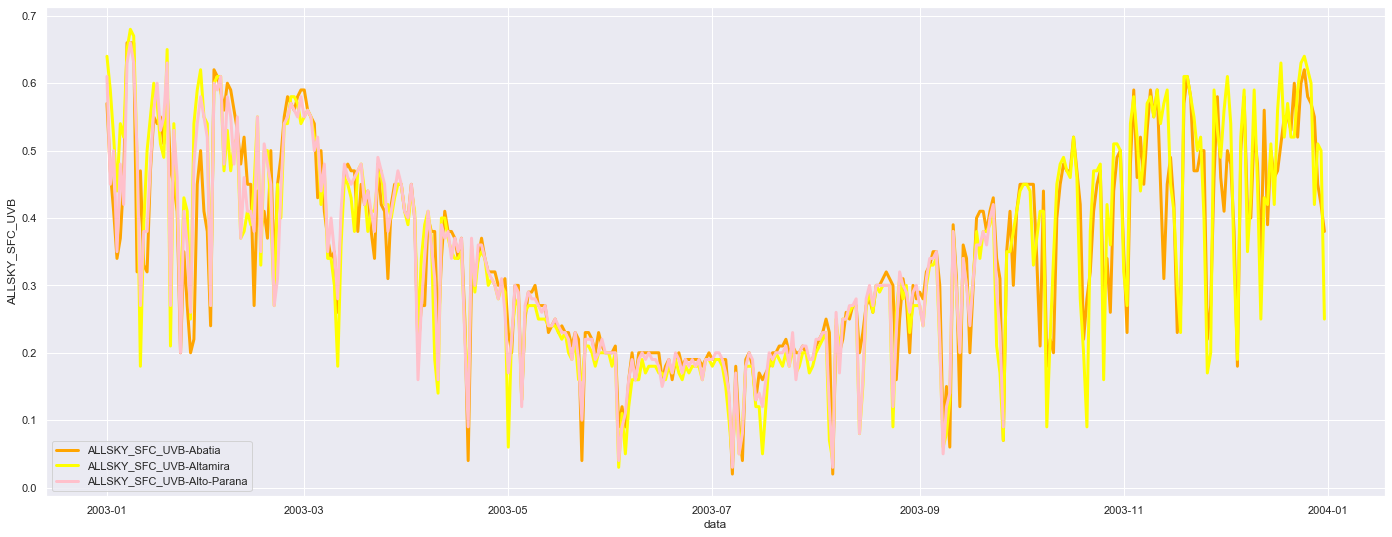

In [125]:
sns.lineplot(data=df_abatia_temperatura, x='data', y='ALLSKY_SFC_UVB', linewidth=3, color='orange', label='ALLSKY_SFC_UVB-Abatia').legend()
sns.lineplot(data=df_altamira_parana_temperatura, x='data', y='ALLSKY_SFC_UVB', linewidth=3, color='yellow', label='ALLSKY_SFC_UVB-Altamira').legend()
sns.lineplot(data=df_alto_parana_temperatura, x='data', y='ALLSKY_SFC_UVB', linewidth=3, color='pink', label='ALLSKY_SFC_UVB-Alto-Parana').legend()

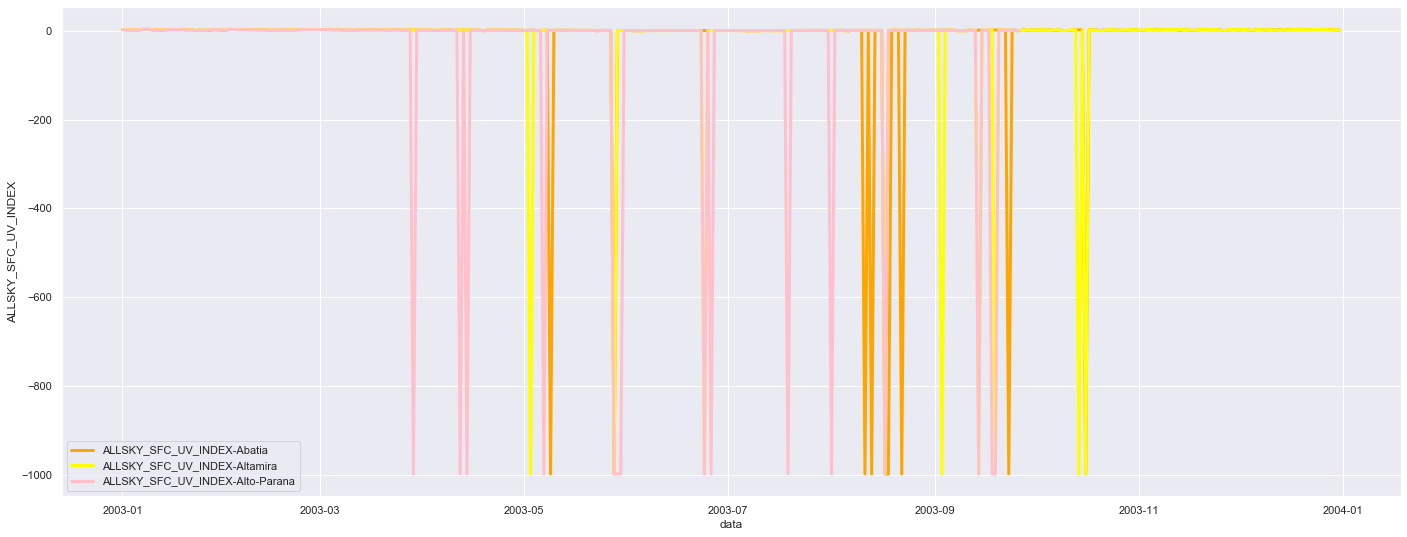

In [136]:
sns.lineplot(data=df_abatia_temperatura, x='data', y='ALLSKY_SFC_UV_INDEX', linewidth=3, color='orange', label='ALLSKY_SFC_UV_INDEX-Abatia').legend()
sns.lineplot(data=df_altamira_parana_temperatura, x='data', y='ALLSKY_SFC_UV_INDEX', linewidth=3, color='yellow', label='ALLSKY_SFC_UV_INDEX-Altamira').legend()
sns.lineplot(data=df_alto_parana_temperatura, x='data', y='ALLSKY_SFC_UV_INDEX', linewidth=3, color='pink', label='ALLSKY_SFC_UV_INDEX-Alto-Parana').legend()

In [128]:
dados_radiacao_especifica

['data',
 'ALLSKY_SFC_PAR_TOT',
 'CLRSKY_SFC_PAR_TOT',
 'ALLSKY_SFC_UVA',
 'ALLSKY_SFC_UVB',
 'ALLSKY_SFC_UV_INDEX']